## 3. Polynomial Regression
- 공부 시간에 다른 시험 점수(우등생)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("PolynomialRegressionData.csv")
dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


In [2]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. Simple Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

#### Visualization

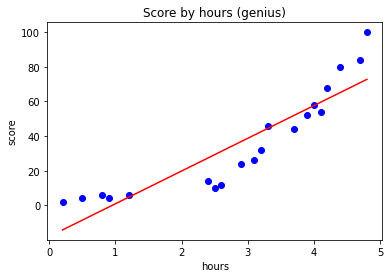

In [6]:
plt.scatter(X, y, color="blue")
plt.plot(X, reg.predict(X), color="red")
plt.title("Score by hours (genius)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [7]:
reg.score(X, y)

0.8169296513411765

## 3-2. Polynomial Regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)  # default: degree = 2
X_poly = poly.fit_transform(X)
X_poly[:5]

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [26]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [27]:
poly.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [28]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression()

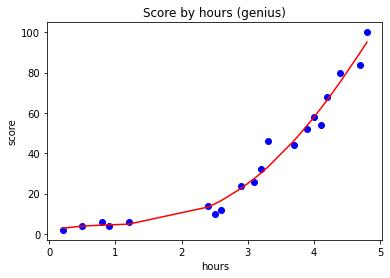

In [29]:
plt.scatter(X, y, color="blue")
plt.plot(X, poly_reg.predict(X_poly), color="red")
plt.title("Score by hours (genius)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [30]:
X_range = np.arange(min(X), max(X), 0.1)
X_range = X_range.reshape(-1, 1)
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

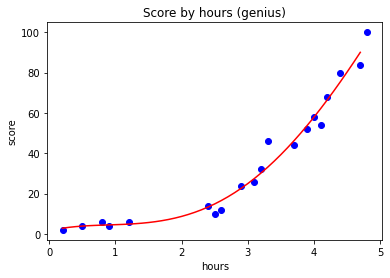

In [31]:
plt.scatter(X, y, color="blue")
plt.plot(X_range, poly_reg.predict(poly.fit_transform(X_range)), color="red")
plt.title("Score by hours (genius)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

#### Prediction

In [33]:
reg.predict([[2]])

array([19.85348988])

In [35]:
poly_reg.predict(poly.fit_transform([[2]]))

array([8.70559135])

#### Evaluation

In [36]:
poly_reg.score(X_poly, y)

0.9782775579000045

In [37]:
reg.score(X, y)

0.8169296513411765